In [4]:
import numpy as np
import pandas as pd

#Import the data file
data = pd.read_csv("Review.csv")

#Preview the data
data.head()

,BusinessId,CoolCount,FunnyCount,NotRecommended,Rating,Text,UsefulCount,UserId,_id
0,long-beach-seafood-singapore,1,0,False,5,Been coming here for more than a decade. Long ...,1,mMjxhRn4h0LD1_jI3RT4cQ,ENx8ZXpulmX5_AfCOp_U3A
1,long-beach-seafood-singapore,3,0,False,5,I've been coming here with my boyfriend to onl...,4,tAr3zFVXoM1K2PrbyCdcTA,Tjd32RIUDeOJrYpJ9J6_GA
2,long-beach-seafood-singapore,2,1,False,5,MUST GO! Your life isn't complete without goin...,1,1-5YghuD_7sLuD01f6hrJw,wYuRHgUSBTm6D8B-HrSpNg
3,long-beach-seafood-singapore,0,0,False,3,"Excellent service, our waiter was always aroun...",0,ZAaT3T_Yd1re0Nt_MOW7AA,lisryzBzdpf4KNXfx6-3Fg
4,long-beach-seafood-singapore,0,0,False,4,Try the Chilli crab. Its gravy was on the swee...,1,oRMf6hs2lgU3bIr_fF_5IA,thceOS2dozAixh8Qu09gOg


In [5]:
#Select only those important columns for our project
df1 = data[['_id','UserId','BusinessId','Rating','Text']]
print(df1)


                          _id                  UserId  \
0      ENx8ZXpulmX5_AfCOp_U3A  mMjxhRn4h0LD1_jI3RT4cQ   
1      Tjd32RIUDeOJrYpJ9J6_GA  tAr3zFVXoM1K2PrbyCdcTA   
2      wYuRHgUSBTm6D8B-HrSpNg  1-5YghuD_7sLuD01f6hrJw   
3      lisryzBzdpf4KNXfx6-3Fg  ZAaT3T_Yd1re0Nt_MOW7AA   
4      thceOS2dozAixh8Qu09gOg  oRMf6hs2lgU3bIr_fF_5IA   
5      7yAZ_47K_aJQlWGM79mYCA  oeAhRa8yFa9jtrhaHnOyxQ   
6      NtBCMPJH_n62YA9Zy83jlw  8aBKh52ePGd3OG8di20wdw   
7      5uOt1hm1LxR-H2NJEs1Vgw  pMltyeuU4SjT6Y8YVy7HBA   
8      qWZ0yoP48ZLoGvj9QVc4TA  fZaWWxwwHGtH-8Vhx7qE_Q   
9      MuIvIPQiYBXJDhicWjSX_g  m7rbZtL4b8du326Ng43SiA   
10     EphGs01wv824ChsIm-bNxA  Q1oMmm7tKPOzA7_gqcV4zg   
11     sVMv2XaWvEn3gGi8dnO3lA  Vtdm-QpN5yYxT-O00cuqFg   
12     Z79DT0ECtm-1YDXFE9fEzA  wwdamcY73iJTyhl-3gGOJw   
13     LeFrcXzAtIG26HKtYdpD6w  11R2R4nyRpF6nqlXH-JeGQ   
14     i57jsdlQtxiSYWovohElAg  ITWi6Z_nZ8mmiSzpSUrDKg   
15     CQ1njdQNZV-Z06VwDeC_5w  3S53VaMDPy8Lywk2TuPb4A   
16     mbIUMsDU3CjAcq9bgwfwrA  

In [6]:
#Create a class for a review 
class Review:
  def __init__(self, reviewId, userId, businessId, rating, text):
    self.reviewId = reviewId
    self.userId = userId
    self.businessId = businessId
    self.rating = rating
    self.text = text
#Do we need a review object? Will it make it easier?

In [7]:
#Logic to Follow
#1. From Pandas dataframe, convert to a corpus of reviews
#2. For each review, split into sentences
#3. Do preprocessing on each of the sentences? 
#    -convert to lowercase
#    -remove weird symbols (Regrex patterns)
#    -stopwords
#    -stemming / lemmatization
#4. Convert each sentences into a vector model
#5. Cluster the sentences (Kmeans VS Hierarchial)
#6. Categorize the clusters (Price/Quality/Ambience etc)
#7. Publish results via Dashboard(???)

# The following statement imports the NLTK package.
#import nltk
# The following statement imports a class called .
#from nltk.corpus import sent_tokenize

In [8]:
# Make a directory to store the corpus files
# Creating individual review files 
# Need to delete Data folder before adding the files again**
import os
import shutil
import timeit
# from textblob import TextBlob as tb
# from textblob import Word
from nltk.tokenize import sent_tokenize

def createFolder(directory):
    try:
        if os.path.exists(directory):
            shutil.rmtree(directory)
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
        

#Create a folder as a corpus
# Creates a folder in the current directory called Data
createFolder('./Data/')

allSentenceData = []

def CreateCorpusFromDataFrame(corpusfolder,df1):
    
    reviewPartDictionary = dict();
    
    
    for index, r in df1.iterrows():
        reviewId = r['_id']
        businessId = r['BusinessId']
        userId = r['UserId']
        rating = r['Rating']
        body = r['Text']
        
#         textblob_body = tb(body) #  textblob
#         body_sentence_list = textblob_body.sentences
        
        #print(body_sentence_list)
        
        sentenceList = sent_tokenize(body)
        numberOfSentences = len(sentenceList)
        
        reviewPartDictionary[str(reviewId)] = numberOfSentences;
        
        for i in range(0, numberOfSentences):
            fname=str(reviewId) + '#' + str(i) + '.txt'
            corpusfile=open(corpusfolder+'/'+fname,'a')
            corpusfile.write(sentenceList[i])
            corpusfile.close()
            allSentenceData.append(sentenceList[i])
            
        
    return reviewPartDictionary
        
start_time = timeit.default_timer()
CreateCorpusFromDataFrame('./Data',df1)
elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

Time Taken: 30.319471388000238


In [1]:
#Prepare the corpus
#This code will take a long while to run...
import timeit
start_time = timeit.default_timer()

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
from preprocess import *
#Load all the files from our Data folder
corpus = load_corpus('Data')

#This is the docs returned after stop_words/stemming etc..
docs = corpus2docs(corpus)

#This is the most important vocabulary/dictionary which gives us a list of all the 'unique' words
dictionary = gensim.corpora.Dictionary(docs)

#This is an array list of each tfidf[vec] (vector docment against tfidf)
vecs = docs2vecs(docs, dictionary)
print(len(docs))

elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

130964
Time Taken: 277.785676214


In [ ]:
#Perform K-means clustering 
# Need to know how many k clusters here (???) <-- what's the optimal!
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
# import k_means
# start_time = timeit.default_timer()

# num_tokens = len(dictionary.token2id)
# clusters = k_means.k_means(vecs, num_tokens, 2)

# elapsed = timeit.default_timer() - start_time
# print("Time Taken: "+ str(elapsed))

In [ ]:
# #Testing Kmeans Clustering

# fids = corpus.fileids()

# #The below prints the file ids in each cluster

# cluster1 = clusters[0]
# print("Cluster 1:", [fids[d] for d in cluster1])

# cluster2 = clusters[1]
# print("Cluster 2:", [fids[d] for d in cluster2])

In [2]:
#Function To Preprocess allSentenceData
import nltk
import re
import timeit
start_time = timeit.default_timer()

stop_list = nltk.corpus.stopwords.words('english')
stemmer = nltk.stem.porter.PorterStemmer()
# print(allSentenceData[0:20])

# def preprocessDocs(docList):
#     docs2 = [doc.lower() for doc in docList]
#     docs3 = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs2]
#     docs4 = [[w for w in doc if w not in stop_list] for doc in docs3]
#     docs5 = [[stemmer.stem(w) for w in doc] for doc in docs4]
#     return docs5

# processedDocs = preprocessDocs(allSentenceData)
# print(processedDocs[0:20])



def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for word in nltk.word_tokenize(text)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        token.lower()
        if re.search('^[a-z]+$', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems

elapsed = timeit.default_timer() - start_time
print("Time Taken: "+ str(elapsed))

Time Taken: 0.04091648699977668


In [12]:
#Testing out other python library with kmeans and viz
#https://radimrehurek.com/gensim/sklearn_api/w2vmodel.html
#https://www.kaggle.com/dipikabaad0107/elbow-curve-for-text-clustering
#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
import nltk
import re
import pylab as pl

from sklearn.cluster import KMeans

from sklearn.decomposition import PCA 

from sklearn.feature_extraction.text import TfidfVectorizer

#Following the preprocessing steps in the tutorial

#load nltk's snowballstemmer as variabled 'stemmer'
# import nltk
# from nltk.stem.snowball import SnowballStemmer
# stemmer = nltk.corpus.stopwords.words('english')

# from gensim.test.utils import common_texts
# from gensim.sklearn_api import W2VTransformer

#Technically we already have the tfidf 
# tfidf = models.TfidfModel(corpus)

# Tokenizer THIS FUCNTION IS CAUSING THE ERROR 'List has no atttibute stem' 
# def tokenize_and_stem(text):
#     # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
#     tokens = [word for word in nltk.word_tokenize(text)]
#     filtered_tokens = []
#     # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
#     for token in tokens:
#         if re.search('[a-zA-Z]', token):
#             filtered_tokens.append(token)
#     stems = [stemmer.stem(t) for t in filtered_tokens]
#     return stems

#define vectorizer parameters
#tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=200000,
#                                 min_df=0.2, stop_words='english',
#                                 use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))
#print(allSentenceData)
#tfidf_matrix = tfidf_vectorizer.fit_transform(allSentenceData) #fit the vectorizer to synopses
#print(tfidf_vectorizer.vocabulary_)
#print(tfidf_matrix.shape)

#++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++

#Small data set
smallData = allSentenceData[0:500]

vectorizer = TfidfVectorizer(stop_words='english',use_idf=True,tokenizer=tokenize_and_stem)
tfidf_matrix = vectorizer.fit_transform(smallData)
print(tfidf_matrix.shape)

terms = vectorizer.get_feature_names() #Get all the features / vocab i think
print(terms[0:20])


(500, 1218)
['abalon', 'abl', 'abov', 'accept', 'accid', 'accompani', 'account', 'acrid', 'actual', 'add', 'addit', 'admit', 'advanc', 'advic', 'afford', 'afternoon', 'afterward', 'ago', 'ahead', 'air']


In [13]:
#import the consine similiarity
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)

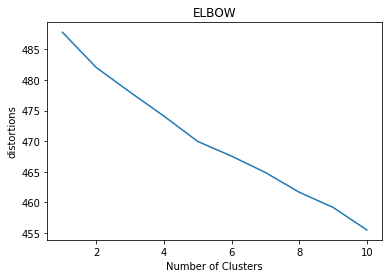

In [14]:
#This method gives me a weird graph that is negative
# Nc = range(1, 50)
# kmeans = [KMeans(n_clusters=i) for i in Nc]
# kmeans

# score = [kmeans[i].fit(tfidf_matrix).score(tfidf_matrix) for i in range(len(kmeans))]
# score

# pl.plot(Nc,score)
# pl.xlabel('Number of Clusters')
# pl.ylabel('Score')
# pl.title('Elbow Curve')
# pl.show()

# Follow the TA way and some tutorial online LOL
# https://www.kaggle.com/dipikabaad0107/elbow-curve-for-text-clustering

distortions = []
K = range(1,11)
for i in K:
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300,n_init=10,random_state=0)
    kmeans.fit(tfidf_matrix)
    distortions.append(kmeans.inertia_)
pl.plot(K,distortions)
pl.title('ELBOW')
pl.xlabel('Number of Clusters')
pl.ylabel('distortions')
pl.show()






# from sklearn.cluster import KMeans
# from sklearn import metrics
# from scipy.spatial.distance import cdist

# distortions = []
# K = range(1,10)
# for k in K:
#     kmeanModel = KMeans(n_clusters=k).fit(tfidf_matrix)
#     kmeanModel.fit(tfidf_matrix)
#     distortions.append(sum(np.min(cdist(tfidf_matrix, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tfidf_matrix.shape[0])